In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

# model
from darts import TimeSeries
from darts.models import ExponentialSmoothing, TBATS, AutoARIMA, ARIMA
#from statsmodels.tsa.filters.hp_filter import hpfilter 
#from statsmodels.tsa.seasonal import seasonal_decompose
#from statsmodels.tsa.holtwinters import SimpleExpSmoothing   # single exponential smoothing as in ewm of pandas
#from statsmodels.tsa.holtwinters import ExponentialSmoothing 
from darts.metrics import rmse, r2_score

In [5]:
# Load the electric dataset(CSV) into a Pandas DataFrame
df_el = pd.read_csv('../Data/dkk_kwh_2023_05_31.csv')
# Select the desired columns
#df_el = df_el[['MTU (CET/CEST)', 'Day-ahead Price [DKK/kWh]']]

# Rename the columns
#df_el = df_el.rename(columns={'MTU (CET/CEST)': 'date', 'Day-ahead Price [DKK/kWh]': 'price'})

# Extract the first 16 characters from the 'date' column
#df_el['date'] = df_el['date'].apply(lambda x: x[0:16])


# Drop rows where 'price' column is equal to '-'
#df_el.drop(df_el[df_el['price'] == '-'].index, inplace=True)
df_el['date'] = pd.to_datetime(df_el['date'])
median_price = df_el['price'].median() #for the missing values

ts = TimeSeries.from_dataframe(df_el, time_col="date", value_cols ="price", fill_missing_dates=True, fillna_value=median_price, freq="H") # use this for training, add missing dates and filled with median values 

train, test = ts[:-24], ts[-24:]

# Using only 24 hour as test because thats what we will be doing

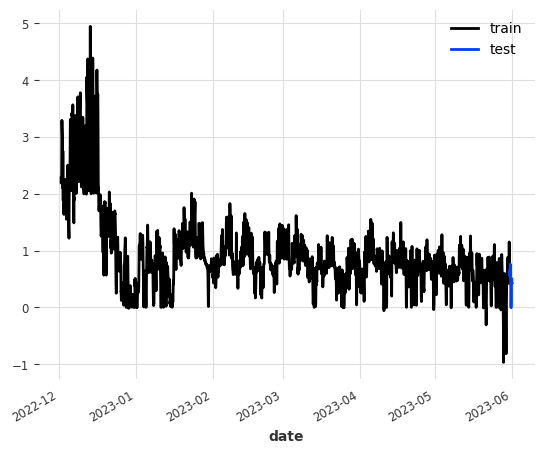

In [7]:
train.plot(label="train")
test.plot(label="test")

In [8]:
model_es = ExponentialSmoothing(seasonal_periods=24)
model_es.fit(train)

ExponentialSmoothing(trend=ModelMode.ADDITIVE, damped=False, seasonal=SeasonalityMode.ADDITIVE, seasonal_periods=24, random_state=0)

In [9]:
pred = model_es.predict(len(test))

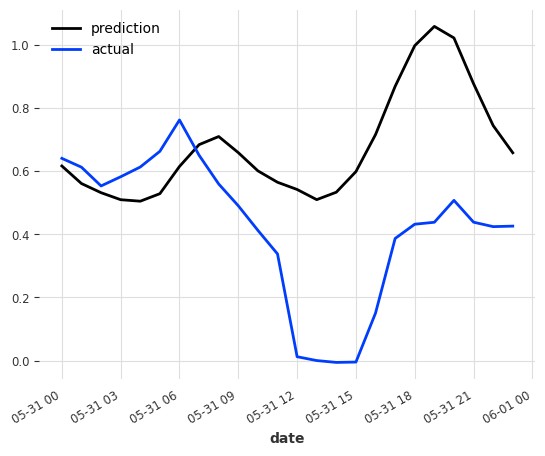

In [10]:
pred.plot(label="prediction")
test.plot(label="actual")

In [11]:
es_rmse = rmse(test, pred)
print("RMSE = {:.2f}".format(es_rmse))

RMSE = 0.37


In [ ]:
historical_forecast_es = model_es.historical_forecasts(
    ts, start=0.6,  forecast_horizon=1, verbose=True)

ts.plot(label="actual")
historical_forecast_es.plot(label="backtest 1 month ahead forecast (Exp. Smoothing)")
es_rmse = rmse(historical_forecast_es, ts)
print("RMSE = {:.2f}".format(es_rmse))

  0%|          | 0/36 [00:00<?, ?it/s]

RMSE = 0.23


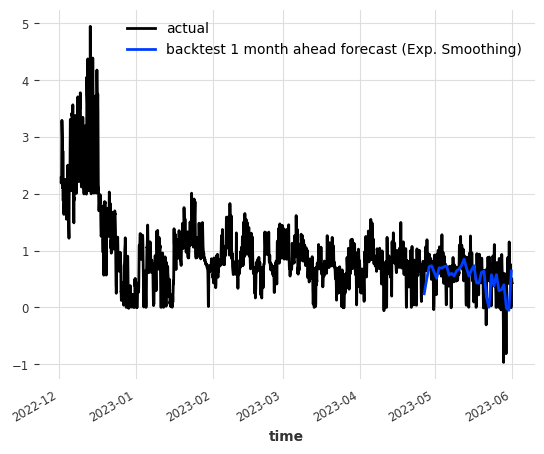

In [25]:
historical_forecast_es = model_es.historical_forecasts(
    ts, start=0.8,  forecast_horizon=24, stride=24, verbose=True)

ts.plot(label="actual")
historical_forecast_es.plot(label="backtest 1 month ahead forecast (Exp. Smoothing)")
es_rmse = rmse(historical_forecast_es, ts)
print("RMSE = {:.2f}".format(es_rmse))